In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import os
import torch
import glob

# read data

In [11]:
def load_spectra(data_path):
    files = sorted(glob.glob(os.path.join(data_path, "*.csv.gz")))
    tb_spectra = []
    tau = []
    for fp in files:
        df = pd.read_csv(fp)
        tb_spectra.append(df.iloc[:, 1].values.astype(np.float32))   # TB column
        tau.append(df.iloc[:, 2].values.astype(np.float32))      # tau column
    return np.asarray(tb_spectra),np.asarray(tau)  # (N, 201)

In [12]:
DATAPATH_BASE = '../../data/'
FITS_PATH     = os.path.join(DATAPATH_BASE, 'fcnm_RHI_z.fits')
CSV_DIR       = os.path.join(DATAPATH_BASE, 'syn_HI_spec_z')

TB,tau = load_spectra(CSV_DIR) 

In [13]:
hdul  = fits.open(FITS_PATH)
fcnm  = hdul[1].data.flatten().astype(np.float32)
RHI   = hdul[2].data.flatten().astype(np.float32)

In [14]:
TB.shape, tau.shape, fcnm.shape, RHI.shape

((262144, 201), (262144, 201), (262144,), (262144,))

Text(0, 0.5, 'Optical Depth')

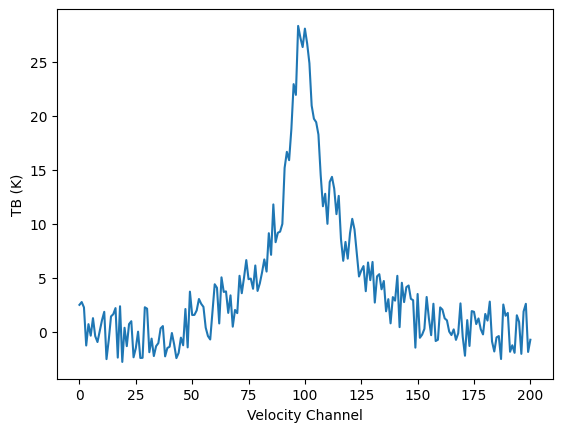

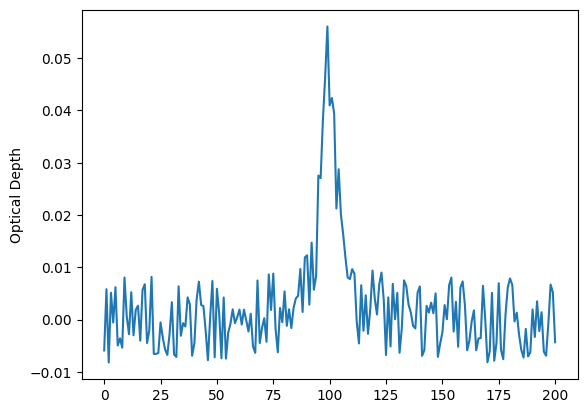

In [17]:
plt.figure
plt.plot(TB[0])
plt.ylabel('TB (K)')
plt.xlabel('Velocity Channel')

plt.figure()
plt.plot(tau[0])
plt.ylabel('Optical Depth')

# evaluate each model